# 1) Delivery_time -> Predict delivery time using sorting time 

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:

df=pd.read_csv("C:\\Users\\mihir\\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
#import sweetviz as sv
#sweet_report= sv.analyze(data)
#sweet_report.show_html('delivery_report.html')

In [6]:
#renames columns
df=df.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1)
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


C:\Users\mihir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

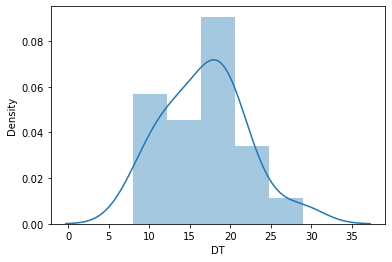

In [8]:
import seaborn as sns
sns.distplot(df['DT'])

C:\Users\mihir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

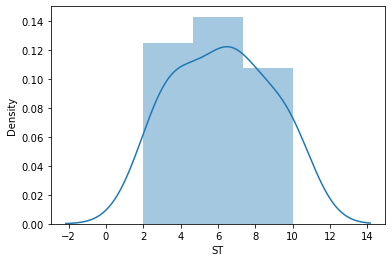

In [9]:
sns.distplot(df['ST'])

In [10]:
import statsmodels.formula.api as smf
model=smf.ols('DT~ST',data=df).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

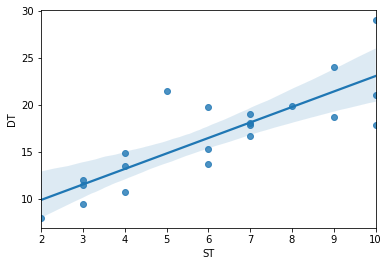

In [11]:
sns.regplot(x='ST',y='DT',data=df)

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        14:13:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Tranformations

In [13]:
df['sqrt_DT']=np.sqrt(df['DT'])
df['sqrt_ST']=np.sqrt(df['ST'])
df.head()

,DT,ST,sqrt_DT,sqrt_ST
0,21.00,10,4.582576,3.162278
1,13.50,4,3.674235,2.000000
2,19.75,6,4.444097,2.449490
3,24.00,9,4.898979,3.000000
4,29.00,10,5.385165,3.162278


In [14]:
#Again build a model
new_ml1=smf.ols('sqrt_DT~sqrt_ST',data=df).fit()
new_ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sqrt_DT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           8.48e-07
Time:                        14:14:05   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
sqrt_ST        1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df['log_DT']=np.log(df['DT'])
df['log_ST']=np.log(df['ST'])
df.head()

,DT,ST,sqrt_DT,sqrt_ST,log_DT,log_ST
0,21.00,10,4.582576,3.162278,3.044522,2.302585
1,13.50,4,3.674235,2.000000,2.602690,1.386294
2,19.75,6,4.444097,2.449490,2.983153,1.791759
3,24.00,9,4.898979,3.000000,3.178054,2.197225
4,29.00,10,5.385165,3.162278,3.367296,2.302585


In [16]:
#Again build a model
new_ml2=smf.ols('log_DT~log_ST',data=df).fit()
new_ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           1.60e-07
Time:                        14:14:06   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
log_ST         0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df['exp_DT']=np.exp(-df['DT'])
df['exp_ST']=np.exp(-df['ST'])
df.head()

,DT,ST,sqrt_DT,sqrt_ST,log_DT,log_ST,exp_DT,exp_ST
0,21.00,10,4.582576,3.162278,3.044522,2.302585,7.582560e-10,0.000045
1,13.50,4,3.674235,2.000000,2.602690,1.386294,1.370959e-06,0.018316
2,19.75,6,4.444097,2.449490,2.983153,1.791759,2.646574e-09,0.002479
3,24.00,9,4.898979,3.000000,3.178054,2.197225,3.775135e-11,0.000123
4,29.00,10,5.385165,3.162278,3.367296,2.302585,2.543666e-13,0.000045


In [18]:
#Again build a model
new_ml3=smf.ols('exp_DT~exp_ST',data=df).fit()
new_ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 exp_DT   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     78.77
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           3.47e-08
Time:                        14:14:07   Log-Likelihood:                 187.70
No. Observations:                  21   AIC:                            -371.4
Df Residuals:                      19   BIC:                            -369.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.365e-05   8.29e-06     -1.646      0.116    -3.1e-05    3.71e-06
exp_ST         0.0021      0.000      8.875      0.000       0.002       0.003
==============================================================================
Omnibus:                       10.040   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.171
Skew:                          -1.061   Prob(JB):                       0.0168
Kurtosis:                       5.200   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df['sq_inv_DT']=1/(df['DT']*df['DT'])
df['sq_inv_ST']=1/(df['ST']*df['ST'])
df.head()

,DT,ST,sqrt_DT,sqrt_ST,log_DT,log_ST,exp_DT,exp_ST,sq_inv_DT,sq_inv_ST
0,21.00,10,4.582576,3.162278,3.044522,2.302585,7.582560e-10,0.000045,0.002268,0.010000
1,13.50,4,3.674235,2.000000,2.602690,1.386294,1.370959e-06,0.018316,0.005487,0.062500
2,19.75,6,4.444097,2.449490,2.983153,1.791759,2.646574e-09,0.002479,0.002564,0.027778
3,24.00,9,4.898979,3.000000,3.178054,2.197225,3.775135e-11,0.000123,0.001736,0.012346
4,29.00,10,5.385165,3.162278,3.367296,2.302585,2.543666e-13,0.000045,0.001189,0.010000


In [20]:
#Again build a model
new_ml4=smf.ols('sq_inv_DT~sq_inv_ST',data=df).fit()
new_ml4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sq_inv_DT   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     121.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           1.11e-09
Time:                        14:14:08   Log-Likelihood:                 110.29
No. Observations:                  21   AIC:                            -216.6
Df Residuals:                      19   BIC:                            -214.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.000      4.949      0.000       0.001       0.003
sq_inv_ST      0.0572      0.005     11.000      0.000       0.046       0.068
==============================================================================
Omnibus:                        5.921   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                3.817
Skew:                           0.996   Prob(JB):                        0.148
Kurtosis:                       3.631   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df['frth_inv_DT']=1/(df['DT']*df['DT']*df['DT']*df['DT'])
df['frth_inv_ST']=1/(df['ST']*df['ST']*df['ST']*df['ST'])
df.head()

,DT,ST,sqrt_DT,sqrt_ST,log_DT,log_ST,exp_DT,exp_ST,sq_inv_DT,sq_inv_ST,frth_inv_DT,frth_inv_ST
0,21.00,10,4.582576,3.162278,3.044522,2.302585,7.582560e-10,0.000045,0.002268,0.010000,0.000005,0.000100
1,13.50,4,3.674235,2.000000,2.602690,1.386294,1.370959e-06,0.018316,0.005487,0.062500,0.000030,0.003906
2,19.75,6,4.444097,2.449490,2.983153,1.791759,2.646574e-09,0.002479,0.002564,0.027778,0.000007,0.000772
3,24.00,9,4.898979,3.000000,3.178054,2.197225,3.775135e-11,0.000123,0.001736,0.012346,0.000003,0.000152
4,29.00,10,5.385165,3.162278,3.367296,2.302585,2.543666e-13,0.000045,0.001189,0.010000,0.000001,0.000100


In [22]:
#Again build a model
new_ml5=smf.ols('frth_inv_DT~frth_inv_ST',data=df).fit()
new_ml5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            frth_inv_DT   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     145.5
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           2.38e-10
Time:                        14:14:09   Log-Likelihood:                 198.80
No. Observations:                  21   AIC:                            -393.6
Df Residuals:                      19   BIC:                            -391.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.296e-05   4.66e-06      2.782      0.012    3.21e-06    2.27e-05
frth_inv_ST     0.0039      0.000     12.061      0.000       0.003       0.005
==============================================================================
Omnibus:                       26.301   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.831
Skew:                           2.392   Prob(JB):                     3.70e-09
Kurtosis:                       7.636   Cond. No.                         74.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
data=df[['frth_inv_DT','frth_inv_ST']]
data.head()

,frth_inv_DT,frth_inv_ST
0,0.000005,0.000100
1,0.000030,0.003906
2,0.000007,0.000772
3,0.000003,0.000152
4,0.000001,0.000100


### Predict for new data points

In [24]:
newdata=pd.Series([6,7,8])
pred=pd.DataFrame(newdata,columns=['frth_inv_ST'])
new_ml5.predict(pred)

0    0.023260
1    0.027135
2    0.031010
dtype: float64

In [25]:
y=np.array(data['frth_inv_DT'])

In [26]:
y_pred=new_ml5.predict(data)

In [27]:
#check RMSE
import sklearn.metrics as mt
mse=mt.mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)  #mse**(0.5)
rmse

1.8724811721879385e-05